# 优先级歧义检测分析

本notebook专门针对用户故事中的**优先级歧义**进行检测和分析。

## 优先级歧义定义
优先级歧义是指用户故事中涉及的功能优先级、重要性或紧急程度不明确。常见包括：
- 优先级标准模糊（"重要功能"、"紧急需求"）
- 相对优先级不明确（"比X重要"但X未定义）
- 实现顺序不清楚
- 业务价值不明确

In [1]:
from ambiguity_detection_utils import AmbiguityDetector

detector = AmbiguityDetector("priority")
file_path = r"data/User Story Ambiguity Dataset_A Comprehensive Research Resource/Cornelius_2025_user_story_ambiguity_dataset.xlsx"
df_test = detector.load_and_prepare_data(file_path, create_balanced=True)

print(f"测试数据集: {len(df_test)} 个用户故事")

Priority歧义统计:
  有priority歧义: 110 (0.9%)
  无priority歧义: 12737 (99.1%)
平衡测试集: 220 个用户故事
  HasAmbiguity=True: 110 (50.0%)
  HasAmbiguity=False: 110 (50.0%)
测试数据集: 220 个用户故事


In [2]:
sample_size = detector.get_recommended_sample_size()

results = detector.run_evaluation(
    df_test, 
    sample_size=sample_size,
    prompt_generator=detector.generate_prompt
)

=== Priority歧义检测评估 ===
测试数据集: 220 个用户故事
Processing model gpt-3.5-turbo...
  Processed 10/20 samples
API call failed (gpt-3.5-turbo): Expecting ':' delimiter: line 3 column 80 (char 119)
API call failed (gpt-3.5-turbo): Expecting ':' delimiter: line 3 column 81 (char 120)
  Processed 20/20 samples
  Priority Ambiguity Detection - Precision: 0.450, Recall: 1.000, F1: 0.621
Processing model deepseek-chat...
  Processed 10/20 samples
  Processed 20/20 samples
  Priority Ambiguity Detection - Precision: 0.450, Recall: 1.000, F1: 0.621


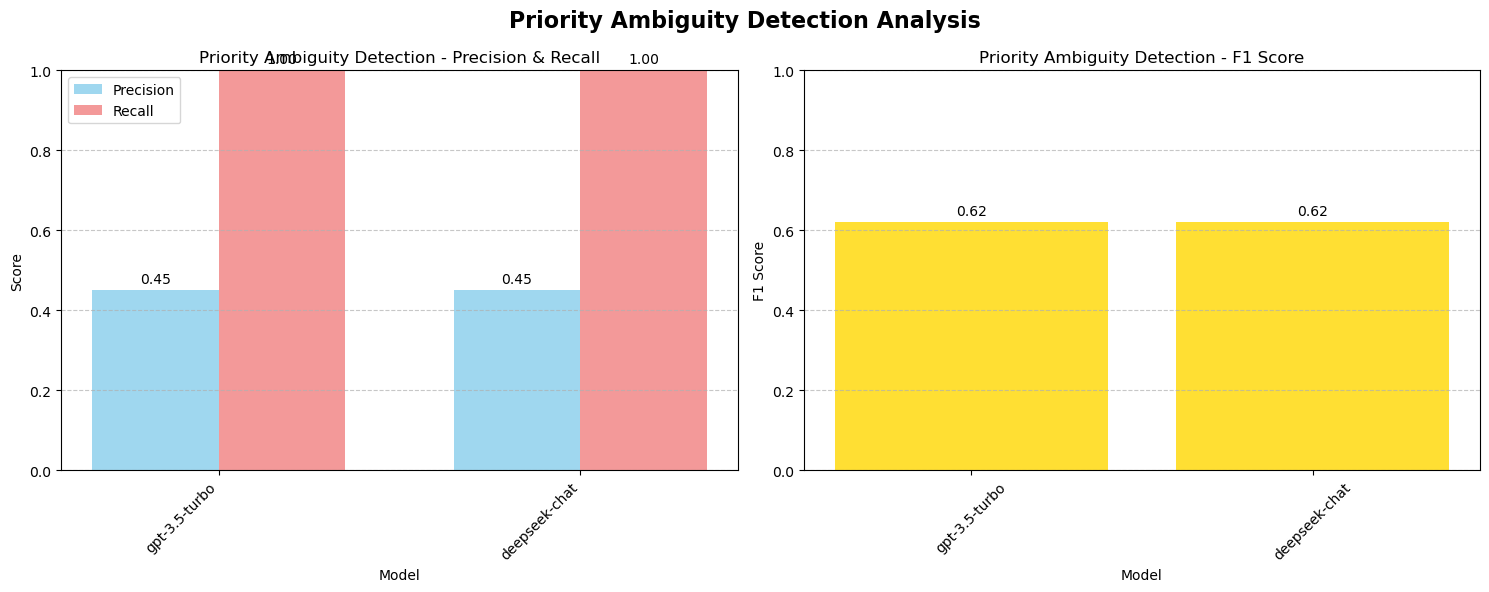

结果已保存到 priority_ambiguity_evaluation_results.json

=== Priority歧义检测评估总结 ===

Model: gpt-3.5-turbo
  Precision: 0.450
  Recall: 1.000
  F1 Score: 0.621

Model: deepseek-chat
  Precision: 0.450
  Recall: 1.000
  F1 Score: 0.621


In [3]:
detector.create_visualization(results, save_prefix="priority")
detector.save_results(results, "priority_ambiguity_evaluation_results.json")
detector.print_summary(results)

In [4]:
from ambiguity_detection_utils import analyze_errors
analyze_errors(results, "actor", num_examples=3)


=== Actor歧义错误分析 ===

分析模型: gpt-3.5-turbo (F1: 0.621)

误报 (False Positives): 11 个
漏报 (False Negatives): 0 个

误报示例 (模型认为有歧义，实际无歧义):

1. 用户故事: As a shopper, I need to checkout so I can track delivery
   模型识别的歧义部分: unknown
   模型推理: unknown

2. 用户故事: As a store owner, I want to checkout in order to find desired items
   模型识别的歧义部分: unknown
   模型推理: unknown

3. 用户故事: As a nurse, I would like to update system to reduce errors
   模型识别的歧义部分: unknown
   模型推理: unknown

漏报示例 (实际有歧义，模型未检测到):
